In [2]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import gamma, norm, poisson
import scipy.stats as st

prng = np.random.default_rng()

In [13]:
df2 = pd.read_csv('prior_data_worldwide.csv')
df2.head()


# fix bounds a  to b  by muliplying by a constnt k and readjust this at the top
beta_data = df2['beta'].to_numpy()
beta_mean = np.mean(beta_data)
beta_std= np.std(beta_data)
rv_beta = st.norm(loc = beta_mean, scale = beta_std)

gamma_data = df2['gamma'].to_numpy()
gamma_mean = np.mean(gamma_data)
gamma_std= np.std(gamma_data)
rv_gamma = st.norm(loc = gamma_mean, scale = gamma_std)

kappa_data = df2['Kappa'].to_numpy()
kappa_mean = np.mean(kappa_data)
kappa_std = np.std(kappa_data)
rv_kappa = st.norm(loc = kappa_mean, scale = kappa_std)

rv_sigma = st.norm(loc = 15, scale = 10)


In [17]:
print(kappa_mean, kappa_std)

0.011290000000000001 0.0030574335642823054


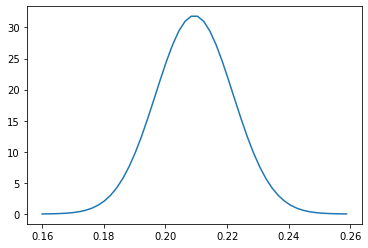

In [15]:
b1 = np.linspace(0.16,0.25872)

beta1 = rv_beta.pdf(b1) 
#

plt.plot(b1,beta1)

In [ ]:
# Attempt 2: I_of_t dependent on U  
# function that computes I_of_t at given t value, and given u paramters, 

def get_i_of_t(u, t):

    # This function already accounts for the ODE's initial conditions

    from scipy.integrate import solve_ivp

    # Parameters of simulation
    N = 10000 # Population

    tmax = 110 # No. of days to simulate

    def sird_model ( t, z, beta, gamma, kappa ):

        s, i, r, d = z

        eq01 = -(beta * s * i)/N
        eq02 = (beta * s * i)/N - (gamma*i) - (kappa*i)
        eq03 = gamma * i
        eq04 = kappa * i

        return np.array([eq01, eq02, eq03, eq04])

    # Initial condition
    i0 = 3
    z0 = np.array([N - i0, i0, 0, 0])

    # Value of parameters
    beta_0 = u[0];
    gamma_0 = u[1];
    kappa_0 = u[2]

    # Solution is computed at these values of t
    t_ser = np.linspace(0,tmax,tmax+1)

    sol = solve_ivp( sird_model, [0, tmax], z0, \
    args=(beta_0, gamma_0, kappa_0), t_eval = t_ser )

    # Solution is stored in individual arrays s(t), i(t), r(t), d(t)
    s_of_t = sol.y[0,:]; i_of_t = sol.y[1,:]; r_of_t = sol.y[2,:]; d_of_t = sol.y[3,:];

    return i_of_t[t]
    # returns i_of_t at any time t